# Neural Network Architecture

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
original = pd.read_csv("diabetes/diabetic_data_original.csv")
original[original["discharge_disposition_id"]==10]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
487,4211154,86797872,Caucasian,Female,[70-80),?,6,10,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
1027,7735086,48070035,Hispanic,Female,[70-80),?,6,10,7,8,...,No,No,No,No,No,No,No,No,Yes,NO
1101,8038050,46590138,Caucasian,Male,[60-70),?,6,10,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1585,10741320,54373995,Caucasian,Female,[90-100),?,6,10,7,5,...,No,No,No,No,No,No,No,No,No,NO
1636,10987152,72268029,Caucasian,Female,[80-90),?,6,10,1,3,...,No,No,No,No,No,No,No,No,Yes,>30
1983,12839190,66062943,Caucasian,Male,[50-60),?,6,10,1,4,...,No,No,No,No,No,No,No,No,Yes,>30


In [4]:
original.info()
#Hence, no need to handle nul value because there isn't any.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
# num_attrib=()
all_col=original.columns.values
num_col=original._get_numeric_data().columns.values

In [6]:
text_col=np.setdiff1d(all_col, num_col)

In [7]:
original= original.replace({'?': np.nan}, regex=False)
original.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
###Process Nan values
###Encounter number is chronological for each patient, so that can arrange each patient 
data = original.drop(["weight", "payer_code"], axis=1)
# #Fill in the NaN values in column "medical_specialty" with "missing" to indicate missing values
data["medical_specialty"].fillna("missing", inplace=True)
# new_balanced_data["race"].fillna("missing", inplace=True)
data.sort_values(by=["patient_nbr", "encounter_id"], inplace=True)
data.head(20)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4267,24437208,135,Caucasian,Female,[50-60),2,1,1,8,Cardiology,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
4780,26264286,135,Caucasian,Female,[50-60),1,1,7,3,Surgery-Cardiovascular/Thoracic,...,No,No,No,No,No,No,No,Ch,Yes,>30
5827,29758806,378,Caucasian,Female,[50-60),3,1,1,2,Surgery-Neuro,...,No,No,No,No,No,No,No,No,No,NO
67608,189899286,729,Caucasian,Female,[80-90),1,3,7,4,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
17494,64331490,774,Caucasian,Female,[80-90),1,1,7,3,InternalMedicine,...,No,No,No,No,No,No,No,Ch,Yes,NO
2270,14824206,927,AfricanAmerican,Female,[30-40),1,1,7,5,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
1164,8380170,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,No,Down,No,No,No,No,No,Ch,Yes,>30
14180,55533660,1152,AfricanAmerican,Female,[60-70),1,1,7,10,Hematology/Oncology,...,No,Steady,No,No,No,No,No,No,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),1,1,7,8,missing,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [9]:
len(data["patient_nbr"].unique())

71518

In [10]:
##Delete the rows that have "NO" for readmitted 
pn_df = data.groupby("patient_nbr").count()
# pn_df["encounter_id"].value_counts()
single_ent=pn_df[pn_df["encounter_id"]<=1]
single_ent_pats = data.loc[data["patient_nbr"].isin(single_ent.index)]
print("Number of patients with only single encounter:", single_ent_pats["patient_nbr"])

#Final_pats_index: patients with more than one encounter
final_pats_index = np.setdiff1d(data["patient_nbr"].values, single_ent_pats["patient_nbr"].values)

final_pats = data.loc[data["patient_nbr"].isin(final_pats_index)]
final_pats.reset_index(inplace=True)
final_pats.drop(columns=["index"], inplace=True)
next_time_in_hospital=[]
final_pat_index=[]
for i in final_pats.index.values:
    if i < 47020:
        if final_pats.loc[i]["patient_nbr"] == final_pats.loc[i+1]["patient_nbr"]:
            next_time_in_hospital.append(final_pats.iloc[i+1]["time_in_hospital"])
            final_pat_index.append(i)
final_pats = final_pats.loc[final_pat_index]
final_pats["next_time_in_hospital"] = next_time_in_hospital
final_pats

Number of patients with only single encounter: 5827            378
67608           729
17494           774
2270            927
18234          1305
            ...    
99863     189351095
95282     189365864
93651     189445127
101748    189481478
96147     189502619
Name: patient_nbr, Length: 54745, dtype: int64


/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
0,24437208,135,Caucasian,Female,[50-60),2,1,1,8,Cardiology,...,Steady,No,No,No,No,No,Ch,Yes,<30,3
2,8380170,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,Steady,No,No,No,No,No,No,Yes,>30,6
3,30180318,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,Down,No,No,No,No,No,Ch,Yes,>30,10
4,55533660,1152,AfricanAmerican,Female,[60-70),1,1,7,10,Hematology/Oncology,...,Steady,No,No,No,No,No,No,Yes,>30,8
5,80742510,1152,AfricanAmerican,Female,[60-70),1,1,7,8,missing,...,Steady,No,No,No,No,No,No,Yes,>30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47011,372665912,188238020,Caucasian,Female,[80-90),1,6,7,3,missing,...,Down,No,No,No,No,No,Ch,Yes,NO,3
47013,344902604,188284883,Other,Female,[80-90),1,1,7,1,missing,...,Steady,No,No,No,No,No,Ch,Yes,>30,2
47015,364338650,188634893,Caucasian,Male,[70-80),3,1,1,4,InternalMedicine,...,Steady,No,No,No,No,No,No,Yes,>30,2
47017,330256946,188970179,Asian,Female,[70-80),1,6,7,4,missing,...,Steady,No,No,No,No,No,Ch,Yes,<30,6


In [11]:
final_pats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30248 entries, 0 to 47019
Data columns (total 49 columns):
encounter_id                30248 non-null int64
patient_nbr                 30248 non-null int64
race                        29853 non-null object
gender                      30248 non-null object
age                         30248 non-null object
admission_type_id           30248 non-null int64
discharge_disposition_id    30248 non-null int64
admission_source_id         30248 non-null int64
time_in_hospital            30248 non-null int64
medical_specialty           30248 non-null object
num_lab_procedures          30248 non-null int64
num_procedures              30248 non-null int64
num_medications             30248 non-null int64
number_outpatient           30248 non-null int64
number_emergency            30248 non-null int64
number_inpatient            30248 non-null int64
diag_1                      30244 non-null object
diag_2                      30180 non-null object
dia

In [12]:
# Integer number of days between admission and discharge
oa_final_data = final_pats.drop(["encounter_id", "patient_nbr"], axis=1)
oa_final_data["race"].fillna("missing", inplace=True)
oa_final_data.dropna(inplace=True)
oa_final_data.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

## Bar graphs to explore the relation between X and y

In [13]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

[0-10)
[10-20)
[20-30)
[30-40)
[40-50)
[50-60)
[60-70)
[70-80)
[80-90)
[90-100)


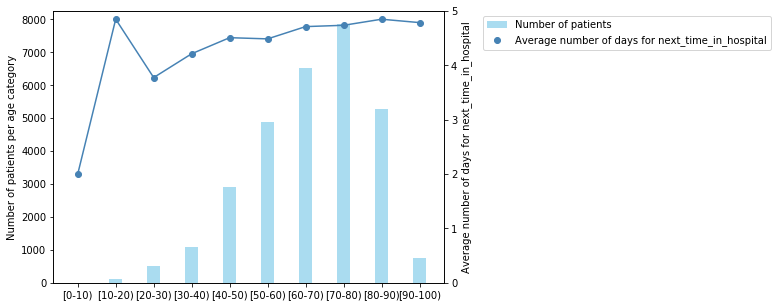

In [14]:
## investigate age-next_time_in_hospital
ave_ntih_ls = []
age_ls = []
fig,ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
for age in np.unique(oa_final_data['age']):
    print(age)
    i = np.where(oa_final_data['age'] == age)
    ave_ntih = np.sum(oa_final_data.iloc[i]['next_time_in_hospital'])/np.array(i).size
    ave_ntih_ls.append(ave_ntih)
    age_ls.append(age)
    #plot bar against total number of people
    #plot line based on ave days of hospital stay for that age cat
    plt2,=ax2.plot(age, ave_ntih, 'o', color='steelblue')
    plt1,=ax1.bar(age, np.array(i).size, width=0.35, alpha=0.7, color='skyblue')


plt.xlabel("Age")
ax1.set_ylabel("Number of patients per age category")
ax2.set_ylabel("Average number of days for next_time_in_hospital")
ax2.plot(age_ls, ave_ntih_ls,'-', color='steelblue')
ax2.set_ylim(0,5)
plt.legend([plt1, plt2],["Number of patients", "Average number of days for next_time_in_hospital"], loc='upper right', bbox_to_anchor=(1.85, 1))
plt.show

plt.savefig('./figs/ave-ntih-inc-trd.png', bbox_inches='tight')

In [15]:
from scipy.optimize import curve_fit

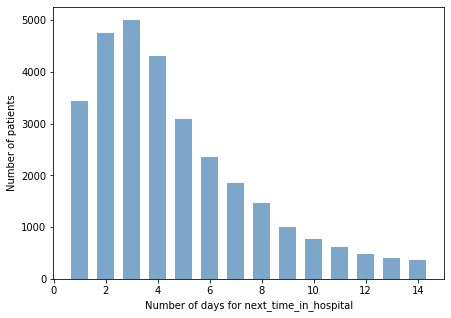

In [16]:
## graph for next_time_in_hos
y = oa_final_data["next_time_in_hospital"].values
fig,ax = plt.subplots(figsize=(7,5))
sizes = []
for t in np.unique(y):
    i = np.where(oa_final_data['next_time_in_hospital'] == t)
    ax.bar(t, np.array(i).size, width=0.65, alpha=0.7, color='steelblue')
    sizes.append(np.array(i).size)
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
plt.ylabel("Number of patients")
plt.xlabel("Number of days for next_time_in_hospital")
plt.show
plt.savefig('./figs/next_t.png', bbox_inches='tight')
##A continuous distribution skewed to the left

<30
>30
NO


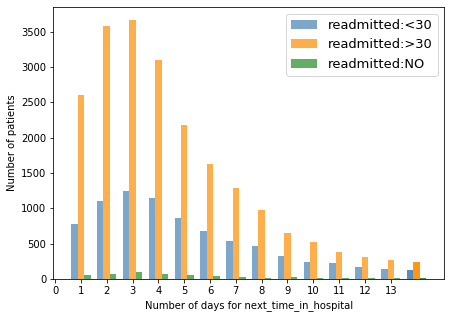

In [17]:
##relation between readmitted and number of days for y
## graph for next_time_in_hos
y = oa_final_data["next_time_in_hospital"].values
fig,ax = plt.subplots(figsize=(7,5))
sizes = []
cmap = matplotlib.cm.get_cmap('jet') 
cdict={
    "<30":'steelblue',
    ">30": 'darkorange',
    "NO":'forestgreen'
}
width=0.25
for rd in np.unique(oa_final_data['readmitted']):
    print(rd)

pos = -width
for rd in np.unique(oa_final_data['readmitted']): 
    for t in np.unique(y):
        i = np.where((oa_final_data['next_time_in_hospital'] == t) & (oa_final_data['readmitted'] == rd))
        if t == 14:
            ax.bar(t+pos,np.array(i).size,  label=("readmitted:"+rd), width=width, alpha=0.7, color=[cdict[rd]])
        ax.bar(t+pos, np.array(i).size, width=width, alpha=0.7, color=[cdict[rd]])
    pos = pos+width
        
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
plt.ylabel("Number of patients")
plt.xlabel("Number of days for next_time_in_hospital")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=13)
plt.xticks(np.arange(14))
plt.show
plt.savefig('./figs/next_t_vs_rd.png', bbox_inches='tight')
##A continuous distribution skewed to the left

### plot numeric data

In [18]:
final_num_attr = ['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
num_df = oa_final_data[final_num_attr]
num_df

,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,8,6,33,0,0,0,8
3,6,4,15,0,0,2,6
4,10,2,19,0,0,1,9
7,2,5,13,0,0,0,9
8,1,5,12,0,0,1,7
...,...,...,...,...,...,...,...
47011,3,0,18,0,0,1,9
47013,1,2,9,0,0,0,5
47015,4,0,11,0,0,0,9
47017,4,1,25,0,0,1,9


/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

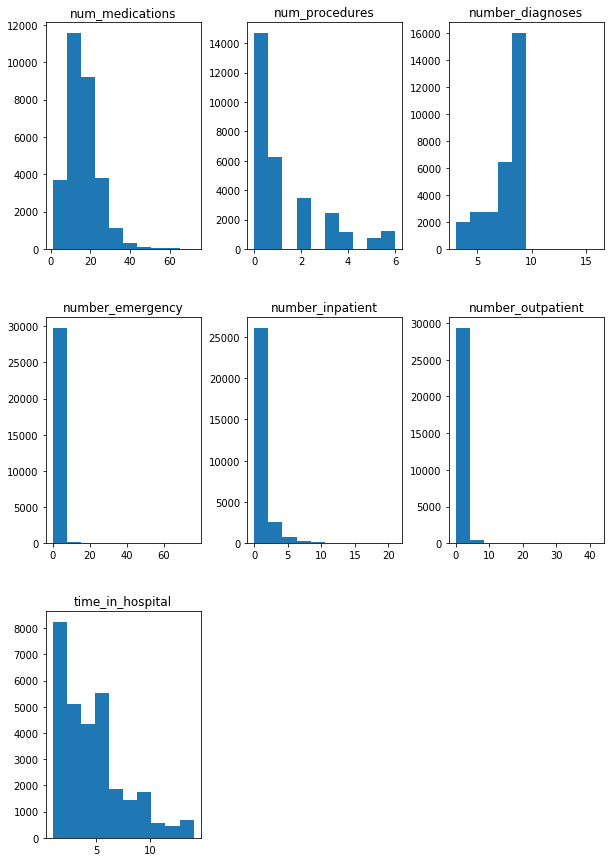

In [82]:
# plot histogram for the num attribs
fig = plt.figure(figsize = (10,15))
ax = fig.gca() #gca = get current axes
subplot = num_df.hist(ax=ax, grid=False, layout=(3,3), align='mid')
subplot
ax.set_xlabel("Number of patients")
plt.savefig('./figs/num_hist.png', bbox_inches='tight')
plt.show

## Start pre-processing the dataset like before:


In [19]:
### Plot to show race distribution before and after
##Before
final_data = oa_final_data.copy()

In [20]:
final_data.groupby("race").count()
#Combine Asian, Hispanic and Other because too few samples in Asian and Hispanic
final_data.replace("Asian", "Other", inplace=True)
final_data.replace("Hispanic", "Other", inplace=True)
final_data.groupby("race").count()


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
race,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,6224,6224,6224,6224,6224,6224,6224,6224,6224,6224,...,6224,6224,6224,6224,6224,6224,6224,6224,6224,6224
Caucasian,22346,22346,22346,22346,22346,22346,22346,22346,22346,22346,...,22346,22346,22346,22346,22346,22346,22346,22346,22346,22346
Other,981,981,981,981,981,981,981,981,981,981,...,981,981,981,981,981,981,981,981,981,981
missing,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,385,385,385,385,385,385


In [21]:
print(oa_final_data['race'].unique())
print(final_data['race'].unique())

['Caucasian' 'AfricanAmerican' 'Hispanic' 'Other' 'missing' 'Asian']
['Caucasian' 'AfricanAmerican' 'Other' 'missing']


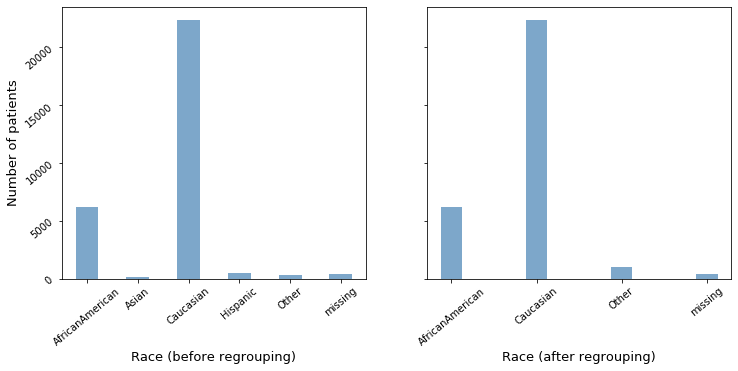

In [22]:
##Plot to show race distribution
fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
for ra in np.unique(oa_final_data["race"].values):
    i = np.where(oa_final_data['race'] == ra)
    ax[0].bar(ra, np.array(i).size, width=0.45, alpha=0.7, color='steelblue')
    
for ra in np.unique(final_data["race"].values):
    i = np.where(final_data['race'] == ra)
    ax[1].bar(ra, np.array(i).size, width=0.25, alpha=0.7, color='steelblue')
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
for i in range(ax.size):
    ax[i].tick_params(labelrotation=40)
ax[0].set_xlabel("Race (before regrouping)", fontsize=13)
ax[0].set_ylabel("Number of patients",fontsize=13)
ax[1].set_xlabel("Race (after regrouping)", fontsize=13)
plt.show
plt.savefig('./figs/race_dist.png', bbox_inches='tight')

In [23]:
## Say that from the graph, even after combining there is very unbalanced distribution
## Hence only pick caucasian
##Only select the caucasian for final prediction and drop race to avoid bias
final_data = final_data[final_data["race"]=="Caucasian"]
final_data.drop(columns=["race"], inplace=True)
final_data_wo_race=final_data.copy()
final_data

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
0,Female,[50-60),2,1,1,8,Cardiology,77,6,33,...,Steady,No,No,No,No,No,Ch,Yes,<30,3
7,Female,[40-50),2,1,1,2,InternalMedicine,50,5,13,...,Steady,No,No,No,No,No,No,Yes,>30,1
8,Female,[40-50),1,1,7,1,InternalMedicine,47,5,12,...,Steady,No,No,No,No,No,No,Yes,<30,3
10,Male,[60-70),1,1,7,2,InternalMedicine,15,0,14,...,Steady,No,No,No,No,No,No,Yes,>30,11
11,Male,[70-80),2,1,1,11,Cardiology,65,4,19,...,Steady,No,No,No,No,No,No,Yes,>30,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47006,Male,[80-90),1,6,7,4,Resident,71,0,18,...,Up,No,No,No,No,No,Ch,Yes,<30,3
47007,Male,[80-90),1,1,7,3,missing,50,0,16,...,Steady,No,No,No,No,No,Ch,Yes,NO,2
47009,Female,[60-70),3,6,1,11,missing,37,1,16,...,Down,No,No,No,No,No,Ch,Yes,NO,2
47011,Female,[80-90),1,6,7,3,missing,65,0,18,...,Down,No,No,No,No,No,Ch,Yes,NO,3


In [24]:
final_data.groupby("age").count()
#Combine age categories below 40 to [0-40) because too few samples in each case
#Same for categories above 80
final_data.replace("[0-10)", "[0-50)", inplace=True)
final_data.replace("[10-20)", "[0-50)", inplace=True)
final_data.replace("[20-30)", "[0-50)", inplace=True)
final_data.replace("[30-40)", "[0-50)", inplace=True)
final_data.replace("[80-90)", "[80-100)", inplace=True)
final_data.replace("[90-100)", "[80-100)", inplace=True)
final_data.replace("[40-50)", "[0-50)", inplace=True)


In [25]:
display(final_data_wo_race.groupby('age').count())
final_data.groupby("age").count()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
age,,,,,,,,,,,,,,,,,,,,,
[0-10),3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
[10-20),88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
[20-30),309,309,309,309,309,309,309,309,309,309,...,309,309,309,309,309,309,309,309,309,309
[30-40),648,648,648,648,648,648,648,648,648,648,...,648,648,648,648,648,648,648,648,648,648
[40-50),1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,...,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789
[50-60),3324,3324,3324,3324,3324,3324,3324,3324,3324,3324,...,3324,3324,3324,3324,3324,3324,3324,3324,3324,3324
[60-70),4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,...,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802
[70-80),6230,6230,6230,6230,6230,6230,6230,6230,6230,6230,...,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
[80-90),4524,4524,4524,4524,4524,4524,4524,4524,4524,4524,...,4524,4524,4524,4524,4524,4524,4524,4524,4524,4524


,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
age,,,,,,,,,,,,,,,,,,,,,
[0-50),2837,2837,2837,2837,2837,2837,2837,2837,2837,2837,...,2837,2837,2837,2837,2837,2837,2837,2837,2837,2837
[50-60),3324,3324,3324,3324,3324,3324,3324,3324,3324,3324,...,3324,3324,3324,3324,3324,3324,3324,3324,3324,3324
[60-70),4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,...,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802
[70-80),6230,6230,6230,6230,6230,6230,6230,6230,6230,6230,...,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
[80-100),5153,5153,5153,5153,5153,5153,5153,5153,5153,5153,...,5153,5153,5153,5153,5153,5153,5153,5153,5153,5153


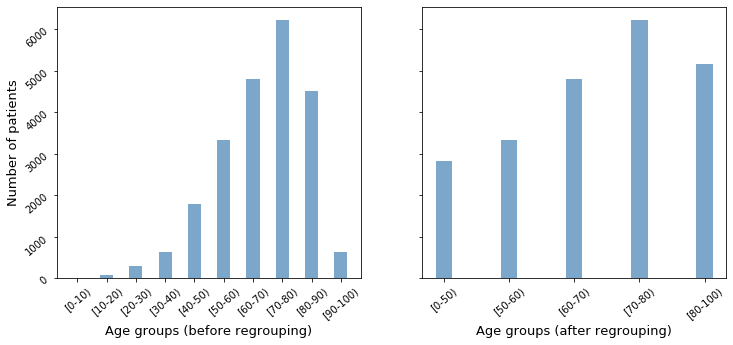

In [150]:
##Plot to show distribution of different age group before and after regrouping

fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
for age in np.unique(final_data_wo_race["age"].values):
    i = np.where(final_data_wo_race['age'] == age)
    ax[0].bar(age, np.array(i).size, width=0.45, alpha=0.7, color='steelblue')
    
for age in np.unique(final_data["age"].values):
    i = np.where(final_data['age'] == age)
    ax[1].bar(age, np.array(i).size, width=0.25, alpha=0.7, color='steelblue')
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
for i in range(ax.size):
    ax[i].tick_params(labelrotation=40)
ax[0].set_xlabel("Age groups (before regrouping)", fontsize=13)
ax[0].set_ylabel("Number of patients",fontsize=13)
ax[1].set_xlabel("Age groups (after regrouping)", fontsize=13)
plt.show
plt.savefig('./figs/age_dist.png', bbox_inches='tight')

In [26]:
#Group 4,5 and 8 together to form "Otherwise"
#Now, 4 is mapped to "Otherwise"
final_data["admission_type_id"].replace(5, 4, inplace=True)
final_data["admission_type_id"].replace(6, 4, inplace=True)
final_data["admission_type_id"].replace(7, 4, inplace=True)
final_data["admission_type_id"].replace(8, 4, inplace=True)

final_data.groupby("admission_type_id").count()

,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
admission_type_id,,,,,,,,,,,,,,,,,,,,,
1,11705,11705,11705,11705,11705,11705,11705,11705,11705,11705,...,11705,11705,11705,11705,11705,11705,11705,11705,11705,11705
2,4212,4212,4212,4212,4212,4212,4212,4212,4212,4212,...,4212,4212,4212,4212,4212,4212,4212,4212,4212,4212
3,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,...,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996
4,2433,2433,2433,2433,2433,2433,2433,2433,2433,2433,...,2433,2433,2433,2433,2433,2433,2433,2433,2433,2433


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


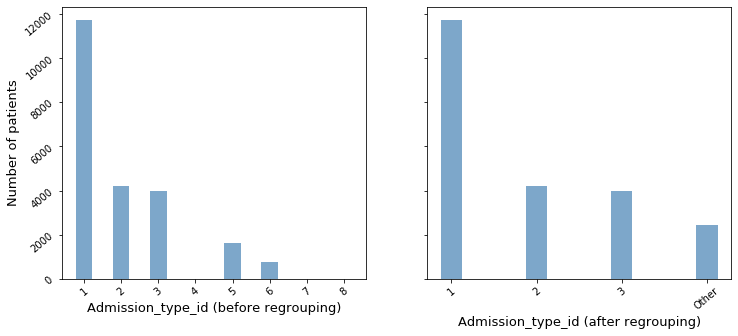

In [20]:
##Plot to show distribution of admission id

fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
for id_ in np.unique(final_data_wo_race["admission_type_id"].values):
    i = np.where(final_data_wo_race['admission_type_id'] == id_)
    ax[0].bar(id_, np.array(i).size, width=0.45, alpha=0.7, color='steelblue')
    
for id_ in np.unique(final_data["admission_type_id"].values):
    print(type(id_))
    i = np.where(final_data['admission_type_id'] == id_)
    ax[1].bar(id_, np.array(i).size, width=0.25, alpha=0.7, color='steelblue')
    
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
for i in range(ax.size):
    ax[i].tick_params(labelrotation=40)
ax[0].set_xlabel("Admission_type_id (before regrouping)", fontsize=13)
ax[0].set_ylabel("Number of patients",fontsize=13)
ax[1].set_xlabel("Admission_type_id (after regrouping)", fontsize=13)
ax[1].set_xticks([1,2,3,4])
ax[1].set_xticklabels([1,2,3,"Other"])
plt.show
plt.savefig('./figs/admin_type.png', bbox_inches='tight')

In [27]:
final_data.groupby("discharge_disposition_id").count()
# Combine the categories with small values into "Otherwise" (int 26)
final_data["discharge_disposition_id"].replace(4, 26, inplace=True)
final_data["discharge_disposition_id"].replace(7, 26, inplace=True)
final_data["discharge_disposition_id"].replace(8, 26, inplace=True)
final_data["discharge_disposition_id"].replace(9, 26, inplace=True)
final_data["discharge_disposition_id"].replace(11, 26, inplace=True)
final_data["discharge_disposition_id"].replace(12, 26, inplace=True)
final_data["discharge_disposition_id"].replace(13, 26, inplace=True)
final_data["discharge_disposition_id"].replace(14, 26, inplace=True)
final_data["discharge_disposition_id"].replace(15, 26, inplace=True)
final_data["discharge_disposition_id"].replace(16, 26, inplace=True)
final_data["discharge_disposition_id"].replace(17, 26, inplace=True)
final_data["discharge_disposition_id"].replace(23, 26, inplace=True)
final_data["discharge_disposition_id"].replace(24, 26, inplace=True)
final_data["discharge_disposition_id"].replace(27, 26, inplace=True)
final_data["discharge_disposition_id"].replace(28, 26, inplace=True)

final_data["discharge_disposition_id"].replace(2, 26, inplace=True)
final_data["discharge_disposition_id"].replace(5, 26, inplace=True)
final_data["discharge_disposition_id"].replace(25, 26, inplace=True)
# discharge_disposition_id 
final_data.groupby("discharge_disposition_id").count()

,gender,age,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
discharge_disposition_id,,,,,,,,,,,,,,,,,,,,,
1,12015,12015,12015,12015,12015,12015,12015,12015,12015,12015,...,12015,12015,12015,12015,12015,12015,12015,12015,12015,12015
3,3802,3802,3802,3802,3802,3802,3802,3802,3802,3802,...,3802,3802,3802,3802,3802,3802,3802,3802,3802,3802
6,3468,3468,3468,3468,3468,3468,3468,3468,3468,3468,...,3468,3468,3468,3468,3468,3468,3468,3468,3468,3468
18,760,760,760,760,760,760,760,760,760,760,...,760,760,760,760,760,760,760,760,760,760
22,581,581,581,581,581,581,581,581,581,581,...,581,581,581,581,581,581,581,581,581,581
26,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,...,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720


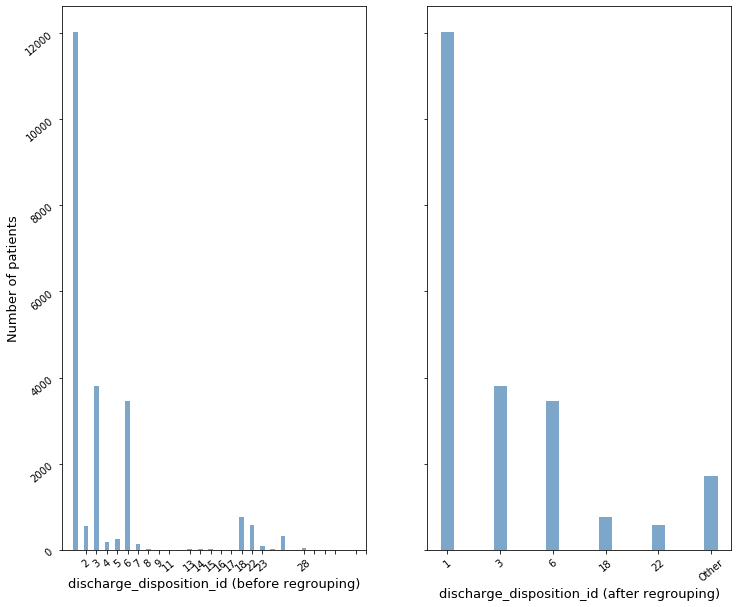

In [22]:
##Plot to show distribution of discharge pos id

fig,ax = plt.subplots(1,2, figsize=(12,10), sharey=True)
for id_ in np.unique(final_data_wo_race["discharge_disposition_id"].values):
    i = np.where(final_data_wo_race['discharge_disposition_id'] == id_)
    ax[0].bar(str(id_), np.array(i).size, width=0.45, alpha=0.7, color='steelblue')
    
for id_ in np.unique(final_data["discharge_disposition_id"].values):
    i = np.where(final_data['discharge_disposition_id'] == id_)
    ax[1].bar(str(id_), np.array(i).size, width=0.25, alpha=0.7, color='steelblue')
    
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
for i in range(ax.size):
    ax[i].tick_params(labelrotation=40)
ax[0].set_xlabel("discharge_disposition_id (before regrouping)", fontsize=13)
ax[0].set_ylabel("Number of patients",fontsize=13)
ax[1].set_xlabel("discharge_disposition_id (after regrouping)", fontsize=13)
ax[0].set_xticks(final_data_wo_race["discharge_disposition_id"].unique())
# ax[1].set_xticks(np.arange(9))
ax[1].set_xticklabels([1,3,6,18,22,"Other"])
plt.show
plt.savefig('./figs/disc-pos.png', bbox_inches='tight')

In [28]:
final_data.groupby("admission_source_id").count()
# Combine the minor categories into "Otherwise" and mapped to 21

final_data["admission_source_id"].replace(2, 21, inplace=True)
final_data["admission_source_id"].replace(3, 21, inplace=True)
final_data["admission_source_id"].replace(4, 21, inplace=True)
final_data["admission_source_id"].replace(5, 21, inplace=True)
final_data["admission_source_id"].replace(6, 21, inplace=True)
final_data["admission_source_id"].replace(8, 21, inplace=True)
final_data["admission_source_id"].replace(9, 21, inplace=True)
final_data["admission_source_id"].replace(10, 21, inplace=True)
final_data["admission_source_id"].replace(20, 21, inplace=True)
final_data["admission_source_id"].replace(22, 21, inplace=True)
final_data.groupby("admission_source_id").count()

,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
admission_source_id,,,,,,,,,,,,,,,,,,,,,
1,6363,6363,6363,6363,6363,6363,6363,6363,6363,6363,...,6363,6363,6363,6363,6363,6363,6363,6363,6363,6363
7,13444,13444,13444,13444,13444,13444,13444,13444,13444,13444,...,13444,13444,13444,13444,13444,13444,13444,13444,13444,13444
17,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,...,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637
21,902,902,902,902,902,902,902,902,902,902,...,902,902,902,902,902,902,902,902,902,902


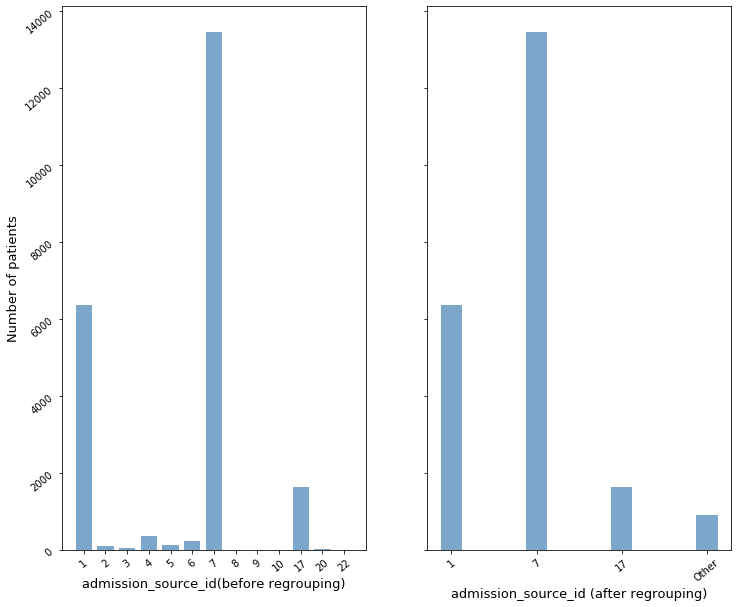

In [24]:
##Plot to show distribution of admission source id

fig,ax = plt.subplots(1,2, figsize=(12,10), sharey=True)
for id_ in np.unique(final_data_wo_race["admission_source_id"].values):
    i = np.where(final_data_wo_race['admission_source_id'] == id_)
    ax[0].bar(str(id_), np.array(i).size, width=0.75, alpha=0.7, color='steelblue')
    
for id_ in np.unique(final_data["admission_source_id"].values):
    i = np.where(final_data['admission_source_id'] == id_)
    ax[1].bar(str(id_), np.array(i).size, width=0.25, alpha=0.7, color='steelblue')
    
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
for i in range(ax.size):
    ax[i].tick_params(labelrotation=40)
ax[0].set_xlabel("admission_source_id(before regrouping)", fontsize=13)
ax[0].set_ylabel("Number of patients",fontsize=13)
ax[1].set_xlabel("admission_source_id (after regrouping)", fontsize=13)
# ax[0].set_xticks(final_data_wo_race["admission_source_id"].unique())
# ax[1].set_xticks(np.arange(9))
ax[1].set_xticklabels([1,7,17,"Other"])
plt.show
plt.savefig('./figs/admis-source.png', bbox_inches='tight')

In [29]:
final_data.groupby("medical_specialty").count()
for name in list(final_data["medical_specialty"]):
    if name[:7] == "Surgery":
        final_data["medical_specialty"].replace(name, "Surgery", inplace=True)
final_data["medical_specialty"].replace("Obsterics&Gynecology-GynecologicOnco", "ObstetricsandGynecology", inplace=True)

kept_med_specialty = ["Cardiology", "Family/GeneralPractice", "InternalMedicine", "Nephrology", "ObstetricsandGynecology", "Orthopedics", "Orthopedics-Reconstructive", "Psychiatry", "Pulmonology", "Surgery", "Urology", "missing"]
print(len(kept_med_specialty))
for name in list(final_data["medical_specialty"]):
    if name not in kept_med_specialty: 
        final_data["medical_specialty"].replace(name, "Other", inplace=True)

print(final_data["medical_specialty"].unique().shape)
final_data.groupby("medical_specialty").count()

12
(13,)


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
medical_specialty,,,,,,,,,,,,,,,,,,,,,
Cardiology,929,929,929,929,929,929,929,929,929,929,...,929,929,929,929,929,929,929,929,929,929
Family/GeneralPractice,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,...,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
InternalMedicine,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,...,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987
Nephrology,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
ObstetricsandGynecology,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Orthopedics,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
Orthopedics-Reconstructive,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
Other,3556,3556,3556,3556,3556,3556,3556,3556,3556,3556,...,3556,3556,3556,3556,3556,3556,3556,3556,3556,3556
Psychiatry,175,175,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175


In [30]:
# Based on the correlation matrix, num_lab_procedures do not contribute much to the readmission rate, hence drop it
final_data.drop(columns="num_lab_procedures", inplace=True)

In [31]:
# This part can only be run once
final_data.groupby("diag_1").count()
# Group the categories together according to the first three digits of ICD9
for icd in list(final_data["diag_1"]):
    if icd[:4] == "250.":
        final_data["diag_1"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V":
        final_data["diag_1"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_1"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_1"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_1"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_1"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_1"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_1"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_1"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_1"].replace(icd, "Other", inplace=True)


In [32]:
final_data.groupby("diag_1").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_1,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,6776,6776,6776,6776,6776,6776,6776,6776,6776,6776,...,6776,6776,6776,6776,6776,6776,6776,6776,6776,6776
Diabetes,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,...,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938
Digestive Disease,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090,...,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090
Genitourinary Disease,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123,...,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
Injury and poisoning,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,...,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
Musculoskeletal Disease,837,837,837,837,837,837,837,837,837,837,...,837,837,837,837,837,837,837,837,837,837
Neoplasms,548,548,548,548,548,548,548,548,548,548,...,548,548,548,548,548,548,548,548,548,548
Other,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,...,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041
Respiratory Disease,3506,3506,3506,3506,3506,3506,3506,3506,3506,3506,...,3506,3506,3506,3506,3506,3506,3506,3506,3506,3506


In [33]:
# This part can only be run once
for icd in list(final_data["diag_2"]):
    if icd[:4] == "250.":
        final_data["diag_2"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        final_data["diag_2"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_2"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_2"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_2"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_2"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_2"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_2"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_2"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_2"].replace(icd, "Other", inplace=True)

In [34]:
final_data.groupby("diag_2").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_2,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,7110,7110,7110,7110,7110,7110,7110,7110,7110,7110,...,7110,7110,7110,7110,7110,7110,7110,7110,7110,7110
Diabetes,1559,1559,1559,1559,1559,1559,1559,1559,1559,1559,...,1559,1559,1559,1559,1559,1559,1559,1559,1559,1559
Digestive Disease,892,892,892,892,892,892,892,892,892,892,...,892,892,892,892,892,892,892,892,892,892
Genitourinary Disease,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,...,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932
Injury and poisoning,442,442,442,442,442,442,442,442,442,442,...,442,442,442,442,442,442,442,442,442,442
Musculoskeletal Disease,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
Neoplasms,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,560,560,560,560,560
Other,6776,6776,6776,6776,6776,6776,6776,6776,6776,6776,...,6776,6776,6776,6776,6776,6776,6776,6776,6776,6776
Respiratory Disease,2723,2723,2723,2723,2723,2723,2723,2723,2723,2723,...,2723,2723,2723,2723,2723,2723,2723,2723,2723,2723


In [35]:
# This part can only be run once
for icd in list(final_data["diag_3"]):
    if icd == "365.44":
        final_data["diag_3"].replace(icd, "Other", inplace=True)
    elif not icd.isdigit():
        continue
    elif icd[:4] == "250.":
        final_data["diag_3"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        final_data["diag_3"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_3"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_3"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_3"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_3"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_3"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_3"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_3"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_3"].replace(icd, "Other", inplace=True)

final_data.groupby("diag_3").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_3,,,,,,,,,,,,,,,,,,,,,
250.01,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
250.02,374,374,374,374,374,374,374,374,374,374,...,374,374,374,374,374,374,374,374,374,374
250.03,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
250.1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
250.11,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V64,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
V65,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
V66,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [36]:
final_data.groupby("diag_3").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_3,,,,,,,,,,,,,,,,,,,,,
250.01,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
250.02,374,374,374,374,374,374,374,374,374,374,...,374,374,374,374,374,374,374,374,374,374
250.03,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
250.1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
250.11,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V64,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
V65,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
V66,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22346 entries, 0 to 47015
Data columns (total 45 columns):
gender                      22346 non-null object
age                         22346 non-null object
admission_type_id           22346 non-null int64
discharge_disposition_id    22346 non-null int64
admission_source_id         22346 non-null int64
time_in_hospital            22346 non-null int64
medical_specialty           22346 non-null object
num_procedures              22346 non-null int64
num_medications             22346 non-null int64
number_outpatient           22346 non-null int64
number_emergency            22346 non-null int64
number_inpatient            22346 non-null int64
diag_1                      22346 non-null object
diag_2                      22346 non-null object
diag_3                      22346 non-null object
number_diagnoses            22346 non-null int64
max_glu_serum               22346 non-null object
A1Cresult                   22346 non-null object
m

In [38]:
#separate the numerically typed and non-numerically types columns first
from pandas.api.types import is_numeric_dtype

num_attrib = list([])
obj_attrib = list([])
for col in final_data.columns:
    if is_numeric_dtype(final_data[col]):
        num_attrib.append(col)
    else:
        obj_attrib.append(col)
print(num_attrib)
print(obj_attrib)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'next_time_in_hospital']
['gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [39]:
#Some numeric values do not have numeric meaning, hence should be encoded as one-hot as well
no_numeric_meaning_attrib = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
new_obj_attrib = obj_attrib + no_numeric_meaning_attrib
new_num_attrib = [x for x in num_attrib if x not in no_numeric_meaning_attrib]
new_num_attrib
print(new_obj_attrib)
print(new_num_attrib)

['gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'next_time_in_hospital']


In [40]:
# Convert datatype of values of new_obj_attrib to object
for itm in new_obj_attrib:
    final_data[itm] = final_data[itm].astype(dtype='str')
    
display(final_data["admission_type_id"])

0        2
7        2
8        1
10       1
11       2
        ..
47006    1
47007    1
47009    3
47011    1
47015    3
Name: admission_type_id, Length: 22346, dtype: object

In [41]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [42]:
#Set num_attrib_scaled as the base dataframe, and add others to the base dataframe 
# Remember to scale the data
scaler = MinMaxScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_data[new_num_attrib]), columns=new_num_attrib)
final_df.reset_index(drop=True, inplace=True)
final_df

,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,next_time_in_hospital
0,0.538462,1.000000,0.450704,0.0,0.0,0.000000,0.384615,0.153846
1,0.076923,0.833333,0.169014,0.0,0.0,0.000000,0.461538,0.000000
2,0.000000,0.833333,0.154930,0.0,0.0,0.047619,0.307692,0.153846
3,0.076923,0.000000,0.183099,0.0,0.0,0.000000,0.461538,0.769231
4,0.769231,0.666667,0.253521,0.0,0.0,0.095238,0.461538,0.538462
...,...,...,...,...,...,...,...,...
22341,0.230769,0.000000,0.239437,0.0,0.0,0.095238,0.461538,0.153846
22342,0.153846,0.000000,0.211268,0.0,0.0,0.190476,0.461538,0.076923
22343,0.769231,0.166667,0.211268,0.0,0.0,0.047619,0.461538,0.076923
22344,0.153846,0.000000,0.239437,0.0,0.0,0.047619,0.461538,0.153846


In [43]:
#Convert the remaining obj attrib to one hot encoder
encoder = LabelBinarizer()
for obj in new_obj_attrib:
    one_hot = encoder.fit_transform(final_data[obj])
    classes = list(encoder.classes_)
#     display(classes)
    if len(classes) <= 2:
        new_df = pd.DataFrame(one_hot, columns=[obj])
    else:
        attr = [obj + " " + s for s in classes]
        new_df = pd.DataFrame(one_hot, columns=attr)
    final_df = pd.concat([final_df, new_df], axis=1, sort=False)

final_df.head(10)
final_df.shape

(22346, 240)

In [44]:
#Get all data for splitting using tsne first
X= final_df.drop(columns=["next_time_in_hospital"]).values
X.shape

(22346, 239)

In [45]:
#corr matrix
corr_matrix = final_df.corr()
corr_matrix["next_time_in_hospital"].sort_values(ascending=False)[:31]

next_time_in_hospital            1.000000
time_in_hospital                 0.203697
discharge_disposition_id 22      0.097124
readmitted <30                   0.081020
discharge_disposition_id 3       0.069977
admission_source_id 21           0.057507
discharge_disposition_id 18      0.057018
num_medications                  0.053976
diag_1 Other                     0.042020
diag_1 Injury and poisoning      0.039974
age [80-100)                     0.035522
number_diagnoses                 0.027090
medical_specialty Psychiatry     0.026671
medical_specialty Orthopedics    0.025965
discharge_disposition_id 26      0.021972
admission_type_id 2              0.021767
A1Cresult >7                     0.020919
medical_specialty Surgery        0.020890
insulin No                       0.020795
number_inpatient                 0.020788
diag_3 E906                      0.020698
admission_type_id 3              0.019746
age [70-80)                      0.019039
medical_specialty Nephrology     0

## tSNE with dim=2 to select training and testing set (not used)

In [ ]:
###Split data into training set and testing set
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)
tsne_results

In [ ]:
#Get the two components
cp1, cp2 = tsne_results[:,0], tsne_results[:,1]
print(cp1.shape)
print(cp2.shape)

In [ ]:
#y should take original values
y = final_data["next_time_in_hospital"].values 
np.unique(y)
cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {}
stp = 10
for lvl in np.unique(y):
    cdict[lvl] = cmap(stp/100)
    stp = stp+5

print(cdict)
fig,ax = plt.subplots(figsize=(15,15))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(cp1[i], cp2[i], label='next_time_in_hospital='+str(np.unique(y)[lvl-1])+' days', marker='o', alpha=0.5, c=[cdict[lvl]]) #c=[cdict[lvl]]
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 15})

#Crop out one cluster for one fold if cv needed
plt.plot([-80, 60], [5,-90], 'r-')

plt.xlabel("t-SNE component 1", fontsize=18)
plt.ylabel("t-SNE component 2", fontsize=18)
plt.savefig('./figs/tSNE_split_2D.png', bbox_inches='tight')
plt.show()


In [ ]:
### Locate the two clusters tdim
idx = []
for i in range(cp1.shape[0]):
    if (cp2[i]+49)/cp1[i]< -95/140:
        idx.append(i)
                 
tesize=len(idx)
print(tesize)
print(tesize/tdim.shape[0])

In [ ]:
test_idx = idx
train_idx = np.setdiff1d(range(cp1.shape[0]), idx)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(np.unique(y_test))

## tSNE with dim=1D to select training and testing sets

In [51]:
###TSNE with different perplexity and dimensionality
###Split data into training set and testing set
from sklearn.manifold import TSNE

tsne_1d = TSNE(n_components=1, verbose=1, perplexity=50)
tsne_1d_results = tsne_1d.fit_transform(X)
tsne_1d_results

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 22346 samples in 0.423s...
[t-SNE] Computed neighbors for 22346 samples in 178.976s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22346
[t-SNE] Computed conditional probabilities for sample 2000 / 22346
[t-SNE] Computed conditional probabilities for sample 3000 / 22346
[t-SNE] Computed conditional probabilities for sample 4000 / 22346
[t-SNE] Computed conditional probabilities for sample 5000 / 22346
[t-SNE] Computed conditional probabilities for sample 6000 / 22346
[t-SNE] Computed conditional probabilities for sample 7000 / 22346
[t-SNE] Computed conditional probabilities for sample 8000 / 22346
[t-SNE] Computed conditional probabilities for sample 9000 / 22346
[t-SNE] Computed conditional probabilities for sample 10000 / 22346
[t-SNE] Computed conditional probabilities for sample 11000 / 22346
[t-SNE] Computed conditional probabilities for sample 12000 / 22346
[t-SNE] Computed conditional probabilities for 

array([[ 32.944347],
       [ 34.072586],
       [-35.326363],
       ...,
       [ 42.206993],
       [-46.584545],
       [ 36.01852 ]], dtype=float32)

In [52]:
tsne_1d_results.shape

(22346, 1)

{1: (0.0, 0.0, 0.945632798573975, 1.0), 2: (0.0, 0.09607843137254903, 1.0, 1.0), 3: (0.0, 0.3, 1.0, 1.0), 4: (0.0, 0.503921568627451, 1.0, 1.0), 5: (0.0, 0.692156862745098, 1.0, 1.0), 6: (0.0, 0.8960784313725491, 0.9709044908285895, 1.0), 7: (0.16129032258064513, 1.0, 0.8064516129032259, 1.0), 8: (0.3257432005060088, 1.0, 0.6419987349778622, 1.0), 9: (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 10: (0.641998734977862, 1.0, 0.3257432005060089, 1.0), 11: (0.8064516129032256, 1.0, 0.16129032258064513, 1.0), 12: (0.9709044908285893, 0.9593318809005086, 0.0, 1.0), 13: (1.0, 0.7705156136528688, 0.0, 1.0), 14: (1.0, 0.5816993464052289, 0.0, 1.0)}
1
2
3
4
5
6
7
8
9
10
11
12
13
14


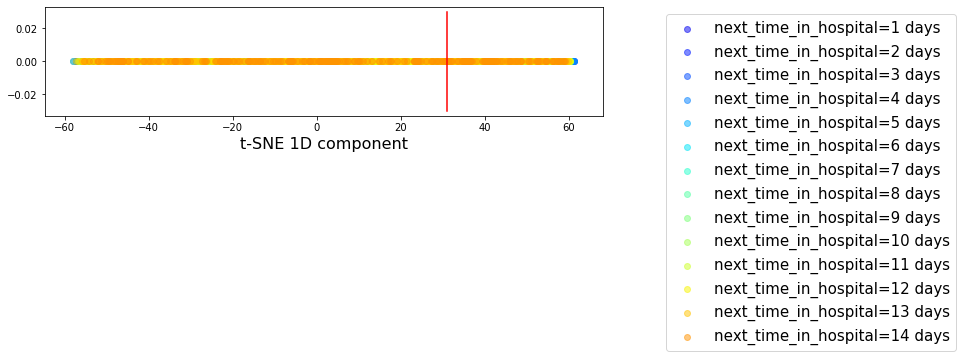

In [53]:
tdim = tsne_1d_results[:,0]

y = final_data["next_time_in_hospital"].values
np.unique(y)
cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {}
stp = 10
for lvl in np.unique(y):
    cdict[lvl] = cmap(stp/100)
    stp = stp+5

print(cdict)
fig,ax = plt.subplots(figsize=(10,2))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(tdim[i], np.zeros_like(tdim[i]), label='next_time_in_hospital='+str(np.unique(y)[lvl-1])+' days', marker='o', alpha=0.5, c=[cdict[lvl]]) #c=[cdict[lvl]]
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 15})

plt.xlabel("t-SNE 1D component", fontsize=16)

plt.plot([31, 31], [-0.03, 0.03], 'r-')

plt.show

plt.savefig('./figs/tSNE_split.png', bbox_inches='tight')


In [61]:
### Locate the two clusters tdim
idx = []
for i in range(tdim.shape[0]):
    if 35 < tdim[i]:
        idx.append(i)
                 
tesize_1d=len(idx)
print(tesize_1d)
print(tesize_1d/tdim.shape[0])

4506
0.20164682717264834


In [62]:
test_idx = idx
train_idx = np.setdiff1d(range(tdim.shape[0]), idx)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(np.unique(y_test))

(17840, 239) (4506, 239)
(17840,) (4506,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


## Derive loss function from poisson distribution

In [ ]:
# from scipy.stats import poisson

# def poisson_loss_fn(y_true, y_pred):
    

## NN1. Multilayer Perceptron

In [63]:
from __future__ import print_function

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

import datetime

import math

In [51]:
# params = {'lr': (0.0001, 1.0, 3),
#           'first_neuron':[32, 64, 128, 256, 512],
#           'do':[0.1, 0.3, 0.5],
#           'act':['relu','tanh']
#          }

def get_model_0hidden_1do(params, time_ls_0hidden_1do, c):

    mlp = Sequential([
                  Dense(params['first_neuron'], activation='relu', input_shape=(239,), kernel_initializer='normal'),
                  Dropout(params['do'], seed=42),
#                   Dense(params['second_neuron'], activation='relu'),
#                   Dropout(0.5, seed=42),
#                   Dense(32, activation='relu'),
#                   Dropout(0, seed=42),
                  Dense(1, activation='linear'),
                ])

    # split a single job to multiple GPUs
    # mlp = multi_gpu_model(mlp, gpus=3)

    # Compile the model
    mlp.compile(
      optimizer=optimizers.Adam(learning_rate=params['lr']),
      loss=tf.keras.losses.Poisson(),
       metrics=['accuracy', 'mse']
    )


    st = datetime.datetime.now()
    
    # Train the data
    history = mlp.fit(
        X_train, # training data
        y_train, # training targets
        epochs=20, #need to manually change
        batch_size=10, #need to manually change
        verbose=0,
        validation_data=(X_test, y_test))
    
    et = datetime.datetime.now()
    
    t = et-st
    print("Training time for cur model:", t)
    time_ls_0hidden_1do[c]=str(t)
    
    return history, mlp


In [240]:
mlp.summary()

Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_365 (Dense)            (None, 128)               30720     
_________________________________________________________________
dropout_220 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_366 (Dense)            (None, 512)               66048     
_________________________________________________________________
dropout_221 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_367 (Dense)            (None, 1)                 513       
Total params: 97,281
Trainable params: 97,281
Non-trainable params: 0
_________________________________________________________________


In [338]:
tf.test.is_gpu_available()

False

In [53]:
p_overall = {'lr': [0.0001, 0.0005, 0.001, 0.003],
          'first_neuron':[128, 256, 512],
          'do':[0, 0.2, 0.5],
          'act':['relu','tanh']
         }
time_ls_0hidden_1do={}
counter=0
result_df_1layer = pd.DataFrame(columns=["learning_rate", "num_of_neurons_layer1", "drop_out", "activation"])
his_dict = {}
                                 
for lr in p_overall['lr']:
    for fn in p_overall['first_neuron']:
        for do in p_overall['do']:
            for act in p_overall['act']:
                p = {'lr': lr,
                     'first_neuron':fn,
                     'do':do,
                     'act':act}
                print('Cur model: lr=',lr, 'fn=',fn, 'do=',do,' act=',act)
                newr = {"learning_rate": lr, "num_of_neurons_layer1":fn, "drop_out":do, "activation":act}
                result_df_1layer = result_df_1layer.append(newr, ignore_index=True)
                history, mlp = get_model_0hidden_1do(p, time_ls_0hidden_1do, counter)
                his_dict[counter]=history.history
                score = mlp.evaluate(X_test, y_test, verbose=0)
                print('Test loss:', score[0])
                print('Test accuracy:', score[1])
                print('Test mse:', score[2])
                print()
#                 plot(history, 'loss', counter)
#                 plot(history, 'accuracy', counter)
#                 plot(history, 'mse', counter)
                counter = counter+1

Cur model: lr= 0.0001 fn= 128 do= 0  act= relu
Training time for cur model: 0:00:40.445056
Test loss: nan
Test accuracy: 0.0
Test mse: 2106817664.0

Cur model: lr= 0.0001 fn= 128 do= 0  act= tanh
Training time for cur model: 0:00:41.466166
Test loss: nan
Test accuracy: 0.0
Test mse: 2974380544.0

Cur model: lr= 0.0001 fn= 128 do= 0.2  act= relu
Training time for cur model: 0:00:45.443455
Test loss: -2.5569037247640094
Test accuracy: 0.1208287924528122
Test mse: 9.111035346984863

Cur model: lr= 0.0001 fn= 128 do= 0.2  act= tanh
Training time for cur model: 1:23:10.410343
Test loss: nan
Test accuracy: 0.0
Test mse: 1946511360.0

Cur model: lr= 0.0001 fn= 128 do= 0.5  act= relu
Training time for cur model: 0:01:05.426861
Test loss: nan
Test accuracy: 0.0
Test mse: 2374078208.0

Cur model: lr= 0.0001 fn= 128 do= 0.5  act= tanh
Training time for cur model: 0:01:10.466439
Test loss: -2.554228894349143
Test accuracy: 0.11406761407852173
Test mse: 9.158014297485352

Cur model: lr= 0.0001 fn= 

Test loss: nan
Test accuracy: 0.0
Test mse: 42931264159744.0

Cur model: lr= 0.001 fn= 512 do= 0.2  act= tanh
Training time for cur model: 0:03:11.508545
Test loss: nan
Test accuracy: 0.0
Test mse: 593371609432064.0

Cur model: lr= 0.001 fn= 512 do= 0.5  act= relu
Training time for cur model: 0:03:07.942140
Test loss: nan
Test accuracy: 0.0
Test mse: 507160576393216.0

Cur model: lr= 0.001 fn= 512 do= 0.5  act= tanh
Training time for cur model: 0:03:11.257744
Test loss: nan
Test accuracy: 0.0
Test mse: 406978450948096.0

Cur model: lr= 0.003 fn= 128 do= 0  act= relu
Training time for cur model: 0:02:10.878411
Test loss: nan
Test accuracy: 0.0
Test mse: 304468285456384.0

Cur model: lr= 0.003 fn= 128 do= 0  act= tanh
Training time for cur model: 0:02:13.616165
Test loss: nan
Test accuracy: 0.0
Test mse: 2808618701291520.0

Cur model: lr= 0.003 fn= 128 do= 0.2  act= relu
Training time for cur model: 0:02:18.095509
Test loss: nan
Test accuracy: 0.0
Test mse: 2391872924286976.0

Cur model:

In [54]:
print(time_ls_0hidden_1do)

{0: '0:00:40.445056', 1: '0:00:41.466166', 2: '0:00:45.443455', 3: '1:23:10.410343', 4: '0:01:05.426861', 5: '0:01:10.466439', 6: '0:01:19.737562', 7: '0:01:22.101457', 8: '0:01:25.958780', 9: '0:01:26.028577', 10: '0:01:28.389439', 11: '0:01:27.547730', 12: '0:01:58.363914', 13: '0:02:01.867658', 14: '0:02:09.654655', 15: '0:02:11.159442', 16: '0:02:08.437633', 17: '0:02:13.221201', 18: '0:01:18.913013', 19: '0:01:21.162456', 20: '0:01:26.885878', 21: '0:01:27.892847', 22: '0:01:29.103828', 23: '0:01:32.438605', 24: '0:01:39.959193', 25: '0:01:42.305637', 26: '0:01:45.118131', 27: '0:01:53.533783', 28: '0:02:01.228511', 29: '0:01:57.342963', 30: '0:02:33.844000', 31: '0:02:55.309896', 32: '0:02:45.227772', 33: '0:02:44.480298', 34: '0:02:47.217277', 35: '0:02:48.653111', 36: '0:01:47.440804', 37: '0:01:52.845336', 38: '0:01:55.395471', 39: '0:01:55.674433', 40: '0:01:57.281479', 41: '0:01:58.385571', 42: '0:02:06.621046', 43: '0:02:11.736724', 44: '0:02:14.674622', 45: '0:02:19.898340

In [173]:
#For this one:epoch=batchsize=10
his_dict
result_df_1layer.replace('1:23:10.410343','0:01:01.443761', inplace=True)
result_df_1layer

,learning_rate,num_of_neurons_layer1,drop_out,activation,time
0,0.0001,128,0.0,relu,0:00:40.445056
1,0.0001,128,0.0,tanh,0:00:41.466166
2,0.0001,128,0.2,relu,0:00:45.443455
3,0.0001,128,0.2,tanh,0:01:01.443761
4,0.0001,128,0.5,relu,0:01:05.426861
5,0.0001,128,0.5,tanh,0:01:10.466439
6,0.0001,256,0.0,relu,0:01:19.737562
7,0.0001,256,0.0,tanh,0:01:22.101457
8,0.0001,256,0.2,relu,0:01:25.958780
9,0.0001,256,0.2,tanh,0:01:26.028577


In [191]:
# df_time = result_df_1layer.copy()
df_time

,learning_rate,num_of_neurons_layer1,drop_out,activation,time
0,0.0001,128,0,relu,0:00:40.445056
1,0.0001,128,0,tanh,0:00:41.466166
2,0.0001,128,0.2,relu,0:00:45.443455
3,0.0001,128,0.2,tanh,1:23:10.410343
4,0.0001,128,0.5,relu,0:01:05.426861
...,...,...,...,...,...
67,0.0030,512,0,tanh,0:03:28.508008
68,0.0030,512,0.2,relu,0:03:32.717897
69,0.0030,512,0.2,tanh,0:03:34.628645
70,0.0030,512,0.5,relu,0:03:40.141741


/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_l

['0:00:40.445056' '0:00:45.443455' '0:01:05.426861'] ['0:01:18.913013' '0:01:26.885878' '0:01:29.103828']


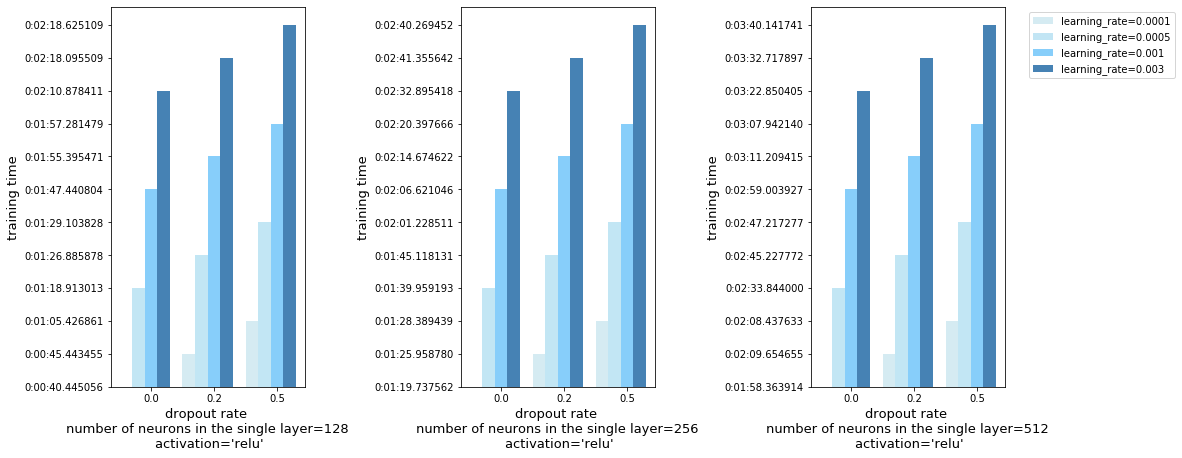

In [168]:
##Plot graph for time and models

x = ['0.0', '0.2', '0.5']
#4 learning-rate bar per position
y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

print(y1, y2)

ind = np.asarray(np.arange(3))

fig, ax = plt.subplots(1,3, figsize=(15, 7))
ax[0].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
ax[0].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
ax[0].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
ax[0].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the single layer=128 \n activation='relu'", fontsize=13)
ax[0].set_ylabel("training time", fontsize=13)




y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

ax[1].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
ax[1].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
ax[1].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
ax[1].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(x)
ax[1].set_xlabel("dropout rate \n number of neurons in the single layer=256 \n activation='relu'", fontsize=13)
ax[1].set_ylabel("training time", fontsize=13)

y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

l1 = ax[2].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
l2 = ax[2].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
l3 = ax[2].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
l4 = ax[2].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[2].set_xticks(ind)
ax[2].set_xticklabels(x)
ax[2].set_xlabel("dropout rate \n number of neurons in the single layer=512 \n activation='relu'", fontsize=13)
ax[2].set_ylabel("training time", fontsize=13)

fig.tight_layout(pad=3.0)
plt.legend([l1, l2, l3 ,l4],["learning_rate=0.0001", "learning_rate=0.0005", "learning_rate=0.001", "learning_rate=0.003"], bbox_to_anchor=(1.1, 1))

plt.savefig('./figs/time-relu.png', bbox_inches='tight')

/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_l

['0:00:41.466166' '0:01:01.443761' '0:01:10.466439'] ['0:01:21.162456' '0:01:27.892847' '0:01:32.438605']


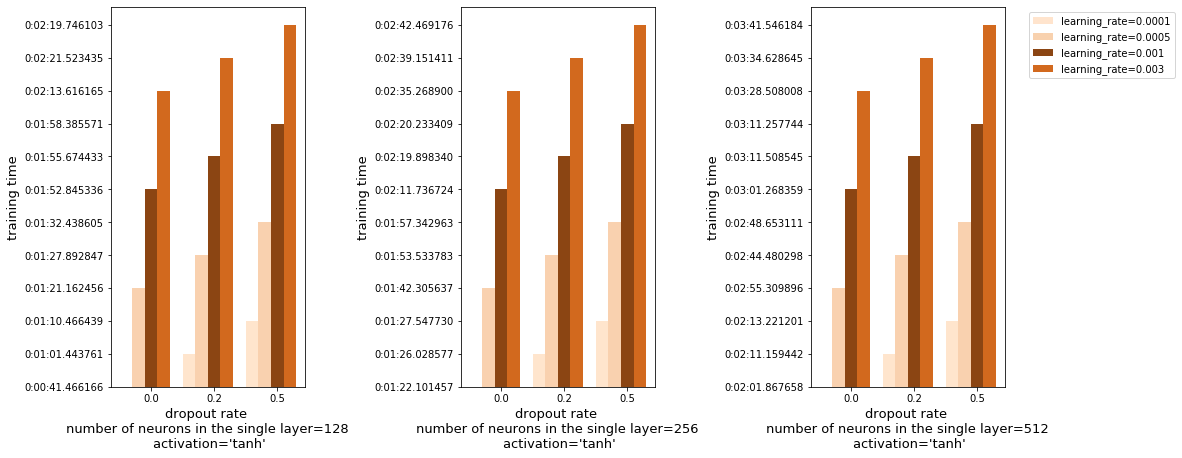

In [169]:
##Plot graph for time and models

x = ['0.0', '0.2', '0.5']
#4 learning-rate bar per position
y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==128]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

print(y1, y2)

ind = np.asarray(np.arange(3))

fig, ax = plt.subplots(1,3, figsize=(15, 7))
ax[0].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
ax[0].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
ax[0].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
ax[0].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the single layer=128 \n activation='tanh'", fontsize=13)
ax[0].set_ylabel("training time", fontsize=13)


y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==256]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

ax[1].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
ax[1].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
ax[1].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
ax[1].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(x)
ax[1].set_xlabel("dropout rate \n number of neurons in the single layer=256 \n activation='tanh'", fontsize=13)
ax[1].set_ylabel("training time", fontsize=13)

y1 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_1layer[result_df_1layer['num_of_neurons_layer1']==512]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

l1 = ax[2].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
l2= ax[2].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
l3=ax[2].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
l4=ax[2].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[2].set_xticks(ind)
ax[2].set_xticklabels(x)
ax[2].set_xlabel("dropout rate \n number of neurons in the single layer=512 \n activation='tanh'", fontsize=13)
ax[2].set_ylabel("training time", fontsize=13)

fig.tight_layout(pad=3.0)
plt.legend([l1, l2, l3 ,l4],["learning_rate=0.0001", "learning_rate=0.0005", "learning_rate=0.001", "learning_rate=0.003"], bbox_to_anchor=(1.1, 1))

plt.savefig('./figs/time-tanh.png', bbox_inches='tight')

In [87]:
def plot(history, met, num_layer):
    plt.plot(history[met])
    plt.plot(history['val_'+met])
    plt.title('model '+ met)
    plt.ylabel(met)
    plt.xlabel('epoch')
    plt.xlim(0, 30)
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./figs/mlp-'+met+'_'+str(num_layer)+'.png', bbox_inches='tight')
    plt.show()

In [179]:
best_perf_hist = his_dict[22]
best_perf_hist

{'val_loss': [-2.5307891463866965,
  -2.5463919334368517,
  -2.5469208047435807,
  -2.54426826809895,
  -2.5398265259460246,
  -2.551811061882807,
  -2.5484970397170685,
  -2.552171869900163,
  -2.551286027577859,
  -2.552636656739557,
  -2.5531701113279164,
  -2.552866265318898,
  -2.549730679209191,
  -2.550951476577535,
  -2.548870714836842,
  -2.5441816389325074,
  -2.5476479735652,
  -2.5276456218692216,
  -2.5242957175042045,
  -2.5467726509112176,
  -2.53641097562544,
  -2.5444826506456053,
  -2.5440472668095726,
  -2.545103441975653,
  -2.5323394652539326,
  -2.5356452861676884,
  -2.528471108166462,
  -2.5410093862092125,
  -2.535233326262369,
  -2.505893920693494],
 'val_accuracy': [0.11319520324468613,
  0.11821155995130539,
  0.10905125737190247,
  0.10643402487039566,
  0.12846237421035767,
  0.11581242829561234,
  0.10992366075515747,
  0.12322791665792465,
  0.11930207163095474,
  0.11603053659200668,
  0.11428571492433548,
  0.11973827332258224,
  0.1269356608390808,
  

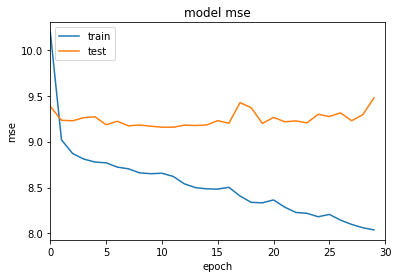

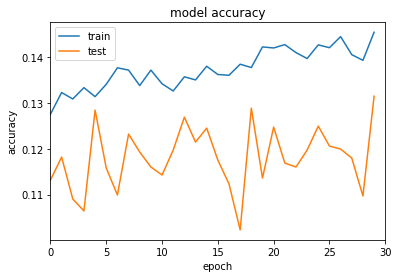

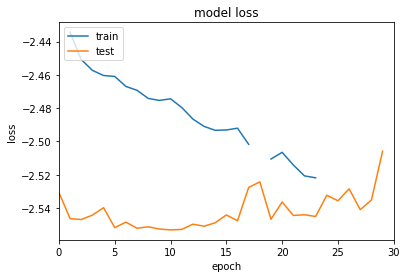

In [180]:
plot(best_perf_hist, 'mse', 1)
plot(best_perf_hist, 'accuracy', 1)
plot(best_perf_hist, 'loss', 1)

In [97]:
#### For hidden layer=1:
###Fix first layer neurons to be 128 and first layer do = 0.5

def get_model_1hidden_2do(params, time_ls_0hidden_1do, c):

    mlp = Sequential([
                  Dense(128, activation='relu', input_shape=(239,), kernel_initializer='normal'),
                  Dropout(0.5, seed=42),
                  Dense(params['second_neuron'], activation=params['act']),
                  Dropout(params['do'], seed=42),
                  Dense(1, activation='linear'),
                ])

    # split a single job to multiple GPUs
    # mlp = multi_gpu_model(mlp, gpus=3)

    # Compile the model
    mlp.compile(
      optimizer=optimizers.Adam(learning_rate=params['lr']),
      loss=tf.keras.losses.Poisson(),
       metrics=['accuracy', 'mse']
    )


    st = datetime.datetime.now()
    
    # Train the data
    history = mlp.fit(
        X_train, # training data
        y_train, # training targets
        epochs=20, #need to manually change
        batch_size=10, #need to manually change
        verbose=0,
        validation_data=(X_test, y_test))
    
    et = datetime.datetime.now()
    
    t = et-st
    print("Training time for cur model:", t)
    time_ls_0hidden_1do[c]=str(t)
    
    return history, mlp




In [105]:
p_overall = {'lr': [0.0001],
          'second_neuron':[512],
          'do':[0],
          'act':['relu']
         }
time_ls_1hidden_2do={}
counter=0
result_df_2layer = pd.DataFrame(columns=["learning_rate", "num_of_neurons_layer1", "drop_out", "activation"])
his_2_dict = {}
                                 
for lr in p_overall['lr']:
    for sn in p_overall['second_neuron']:
        for do in p_overall['do']:
            for act in p_overall['act']:
                p = {'lr': lr,
                     'second_neuron':sn,
                     'do':do,
                     'act':act}
                print('Cur model: lr=',lr, 'sn=',sn, 'do=',do,' act=',act)
                newr = {"learning_rate": lr, "num_of_neurons_layer1":128, "num_of_neurons_layer2":sn, "drop_out":do, "activation":act}
                result_df_2layer = result_df_2layer.append(newr, ignore_index=True)
                history, mlp = get_model_1hidden_2do(p, time_ls_1hidden_2do, counter)
                his_2_dict[counter]=history.history
                score = mlp.evaluate(X_test, y_test, verbose=0)
                print('Test loss:', score[0])
                print('Test accuracy:', score[1])
                print('Test mse:', score[2])
                print()
#                 plot(history, 'loss', counter)
#                 plot(history, 'accuracy', counter)
#                 plot(history, 'mse', counter)
                counter = counter+1

Cur model: lr= 0.0001 sn= 512 do= 0  act= relu
Training time for cur model: 0:00:48.676727
Test loss: -2.5809117360375375
Test accuracy: 0.14780293405056
Test mse: 9.649471282958984



In [227]:
# result_df_2layer = result_df_1layer.loc[72:147]
# result_df_2layer.reset_index(inplace=True)
result_df_2layer = result_df_2layer.drop(columns=["index"])
result_df_2layer.head(30)

,learning_rate,num_of_neurons_layer1,drop_out,activation,time,num_of_neurons_layer2
0,0.0001,128,0.0,relu,NaN,32.0
1,0.0001,128,0.0,relu,NaN,32.0
2,0.0001,128,0.0,relu,NaN,32.0
3,0.0001,128,0.0,relu,NaN,32.0
4,0.0001,128,0.0,tanh,NaN,32.0
5,0.0001,128,0.2,relu,NaN,32.0
6,0.0001,128,0.2,tanh,NaN,32.0
7,0.0001,128,0.5,relu,NaN,32.0
8,0.0001,128,0.5,tanh,NaN,32.0
9,0.0001,128,0.0,relu,NaN,64.0


In [234]:
df_2 = result_df_2layer.copy()
df_2.drop(columns=["time"], inplace=True)
df_2 = df_2.iloc[3:]
df_2["time"]=time_ls_1hidden_2do.values()
df_2
result_df_2layer = df_2

/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-pac

['0:01:26.084226' '0:01:29.685385' '0:01:48.355086'] ['0:01:55.494856' '0:02:07.318075' '0:02:09.924599']


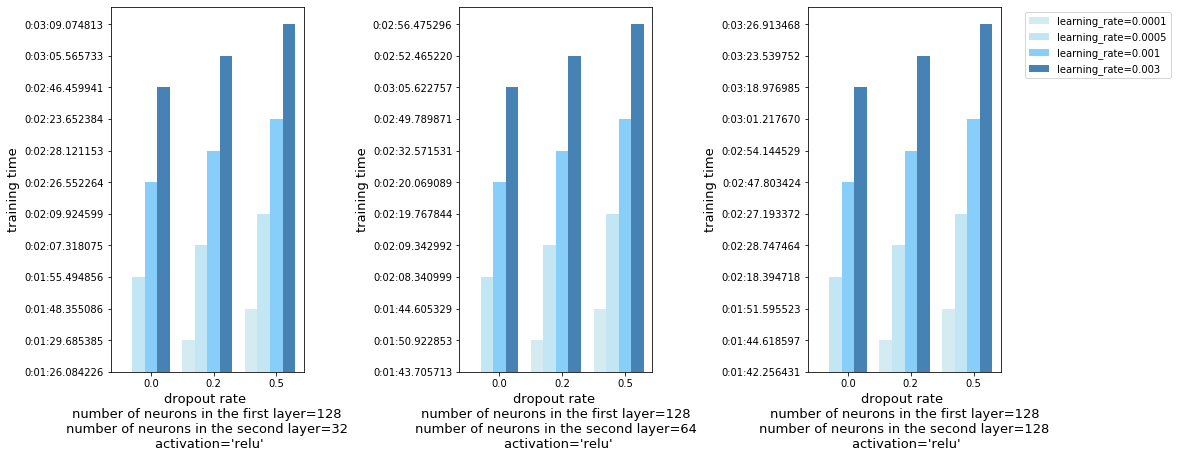

In [235]:
###PLOTTTT
##Plot graph for time and models

x = ['0.0', '0.2', '0.5']
#4 learning-rate bar per position
y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

print(y1, y2)

ind = np.asarray(np.arange(3))

fig, ax = plt.subplots(1,3, figsize=(15, 7))
ax[0].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
ax[0].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
ax[0].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
ax[0].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=32 \n activation='relu'", fontsize=13)
ax[0].set_ylabel("training time", fontsize=13)




y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

ax[1].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
ax[1].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
ax[1].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
ax[1].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(x)
ax[1].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=64 \n activation='relu'", fontsize=13)
ax[1].set_ylabel("training time", fontsize=13)

y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='relu']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='relu']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='relu']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='relu']['time'].values

l1 = ax[2].bar(ind-0.4, y1, width=0.2, color='lightblue', alpha=0.5, align='center')
l2 = ax[2].bar(ind-0.2, y2, width=0.2,  color='skyblue', alpha=0.5,align='center')
l3 = ax[2].bar(ind, y3, width=0.2, color='lightskyblue', align='center')
l4 = ax[2].bar(ind+0.2, y4, width=0.2,  color='steelblue',align='center')
ax[2].set_xticks(ind)
ax[2].set_xticklabels(x)
ax[2].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=128 \n activation='relu'", fontsize=13)
ax[2].set_ylabel("training time", fontsize=13)

fig.tight_layout(pad=3.0)
plt.legend([l1, l2, l3 ,l4],["learning_rate=0.0001", "learning_rate=0.0005", "learning_rate=0.001", "learning_rate=0.003"], bbox_to_anchor=(1.1, 1))

plt.savefig('./figs/2-layers-time-relu.png', bbox_inches='tight')

/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_l

['0:01:27.138616' '0:01:40.862758' '0:01:44.111273'] ['0:01:59.793610' '0:02:05.520589' '0:02:07.353122']


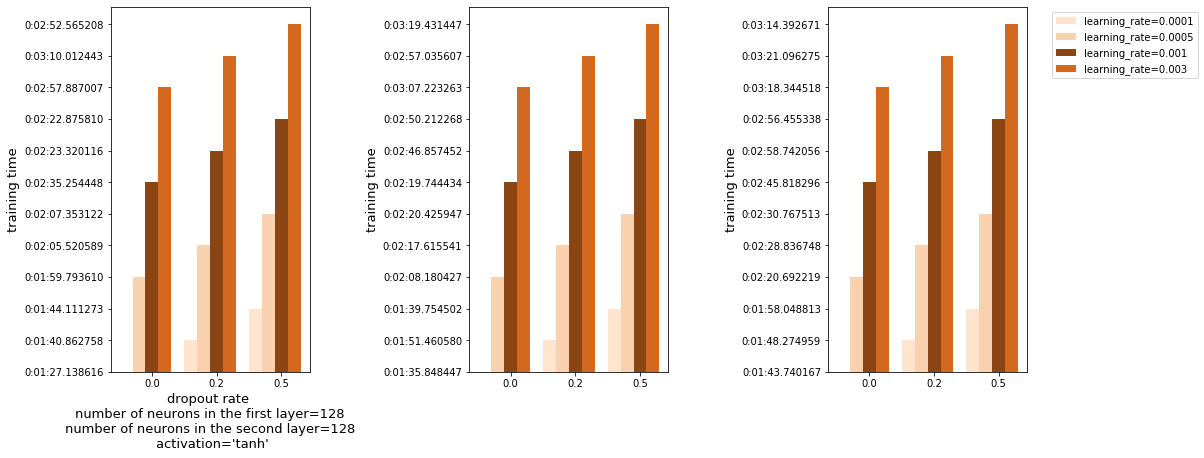

In [242]:
##Plot graph for time and models

x = ['0.0', '0.2', '0.5']
#4 learning-rate bar per position
y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==32.0]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

print(y1, y2)

ind = np.asarray(np.arange(3))

fig, ax = plt.subplots(1,3, figsize=(15, 7))
ax[0].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
ax[0].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
ax[0].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
ax[0].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=32 \n activation='tanh'", fontsize=13)
ax[0].set_ylabel("training time", fontsize=13)


y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==64]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

ax[1].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
ax[1].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
ax[1].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
ax[1].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=64 \n activation='tanh'", fontsize=13)
ax[1].set_ylabel("training time", fontsize=13)

y1 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y1 = y1[y1['learning_rate']==0.0001][y1['activation']=='tanh']['time'].values

y2 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y2 = y2[y2['learning_rate']==0.0005][y2['activation']=='tanh']['time'].values

y3 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y3 = y3[y3['learning_rate']==0.001][y3['activation']=='tanh']['time'].values

y4 = result_df_2layer[result_df_2layer['num_of_neurons_layer2']==128]
y4 = y4[y4['learning_rate']==0.003][y4['activation']=='tanh']['time'].values

l1 = ax[2].bar(ind-0.4, y1, width=0.2, color='peachpuff', alpha=0.7, align='center')
l2= ax[2].bar(ind-0.2, y2, width=0.2,  color='sandybrown', alpha=0.5,align='center')
l3=ax[2].bar(ind, y3, width=0.2, color='saddlebrown', align='center')
l4=ax[2].bar(ind+0.2, y4, width=0.2,  color='chocolate',align='center')
ax[2].set_xticks(ind)
ax[2].set_xticklabels(x)
ax[0].set_xlabel("dropout rate \n number of neurons in the first layer=128 \n number of neurons in the second layer=128 \n activation='tanh'", fontsize=13)
ax[2].set_ylabel("training time", fontsize=13)

fig.tight_layout(pad=3.0)
plt.legend([l1, l2, l3 ,l4],["learning_rate=0.0001", "learning_rate=0.0005", "learning_rate=0.001", "learning_rate=0.003"], bbox_to_anchor=(1.1, 1))

plt.savefig('./figs/time-tanh.png', bbox_inches='tight')

In [211]:
time_ls_1hidden_2do[]

{0: '0:01:26.084226',
 1: '0:01:27.138616',
 2: '0:01:29.685385',
 3: '0:01:40.862758',
 4: '0:01:48.355086',
 5: '0:01:44.111273',
 6: '0:01:43.705713',
 7: '0:01:35.848447',
 8: '0:01:50.922853',
 9: '0:01:51.460580',
 10: '0:01:44.605329',
 11: '0:01:39.754502',
 12: '0:01:42.256431',
 13: '0:01:43.740167',
 14: '0:01:44.618597',
 15: '0:01:48.274959',
 16: '0:01:51.595523',
 17: '0:01:58.048813',
 18: '0:01:55.494856',
 19: '0:01:59.793610',
 20: '0:02:07.318075',
 21: '0:02:05.520589',
 22: '0:02:09.924599',
 23: '0:02:07.353122',
 24: '0:02:08.340999',
 25: '0:02:08.180427',
 26: '0:02:09.342992',
 27: '0:02:17.615541',
 28: '0:02:19.767844',
 29: '0:02:20.425947',
 30: '0:02:18.394718',
 31: '0:02:20.692219',
 32: '0:02:28.747464',
 33: '0:02:28.836748',
 34: '0:02:27.193372',
 35: '0:02:30.767513',
 36: '0:02:26.552264',
 37: '0:02:35.254448',
 38: '0:02:28.121153',
 39: '0:02:23.320116',
 40: '0:02:23.652384',
 41: '0:02:22.875810',
 42: '0:02:20.069089',
 43: '0:02:19.744434'

In [107]:
best_perf_hist = his_2_dict[0]
best_perf_hist

{'val_loss': [-2.5975757251136895,
  -2.610731202132646,
  -2.6282839446138015,
  -2.632427145770796,
  -2.6232571660867974,
  -2.632624642181062,
  -2.6215053068575624,
  -2.635852712927873,
  -2.6310783205595225,
  -2.629388013645871,
  -2.5913388098342467,
  -2.6320747523204804,
  -2.573575215519576,
  -2.6151330389638,
  -2.586893422943295,
  -2.590953689951514,
  -2.6357088363880297,
  -2.5855816601904973,
  -2.5746279096340823,
  -2.5809117243672763],
 'val_accuracy': [0.10896582156419754,
  0.10807811468839645,
  0.12316910922527313,
  0.12072791904211044,
  0.12760762870311737,
  0.12561029195785522,
  0.1360408365726471,
  0.1320461630821228,
  0.13071459531784058,
  0.13493120670318604,
  0.13737238943576813,
  0.1384820193052292,
  0.14491789042949677,
  0.14358632266521454,
  0.14358632266521454,
  0.14358632266521454,
  0.12960496544837952,
  0.14447402954101562,
  0.14580559730529785,
  0.14780293405056],
 'val_mse': [9.580767631530762,
  9.454663276672363,
  9.3024091720

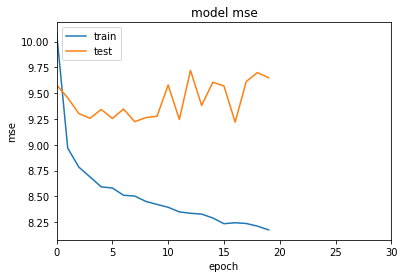

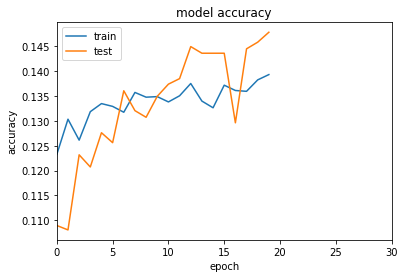

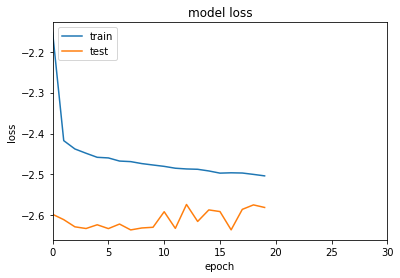

In [108]:
plot(best_perf_hist, 'mse', 2)
plot(best_perf_hist, 'accuracy', 2)
plot(best_perf_hist, 'loss', 2)

In [291]:
y_pred=mlp.predict(X_test)
print(y_pred)
y_pred_int=[]
for y in y_pred:
    if y-math.floor(y) <=0.5:
        y_pred_int.append(math.floor(y))
    else:
        y_pred_int.append(math.ceil(y))

[[4.415247 ]
 [3.9698782]
 [6.2925677]
 ...
 [3.7166038]
 [2.8038154]
 [4.962833 ]]


In [74]:
#Plot graph
print(history.history.keys())
# summarize history for accuracy

dict_keys(['val_loss', 'val_accuracy', 'val_mse', 'loss', 'accuracy', 'mse'])


In [117]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_int))

NameError: name 'y_pred_int' is not defined

In [66]:
###PCA to reduce dimensionality
from sklearn.decomposition import PCA
# n_pc = 30

# pca = PCA(n_components=n_pc)
# pca_tr = pca.fit_transform(X_train)
# pca_te = pca.transform(X_test)

In [67]:
###New MLP with dim=PC_components
mlp = Sequential([
              Dense(128, activation='relu', input_shape=(n_pc,), kernel_initializer='normal'),
              Dropout(0.5, seed=42),
              Dense(32, activation='relu'),
              Dropout(0, seed=42),
            #   Dense(8, activation='relu'),
            #   Dropout(Dropout(0.50, seed=42)),
              Dense(1, activation='linear'),
            ])

# split a single job to multiple GPUs
# mlp = multi_gpu_model(mlp, gpus=3)

# Compile the model
mlp.compile(
  optimizer=optimizers.Adam(learning_rate=0.0001),
  loss='binary_crossentropy',
  metrics=['accuracy'],
)



In [84]:
###Apply MLP on PCA PCs
pca_t = {}
l = np.arange(5)
n = 10
hist_dict={}
for i in l:
    n_pc = n

    pca = PCA(n_components=n_pc)
    pca_tr = pca.fit_transform(X_train)
    pca_te = pca.transform(X_test)
    
    
    mlp = Sequential([
              Dense(128, activation='relu', input_shape=(n_pc,), kernel_initializer='normal'),
              Dropout(0.5, seed=42),
              Dense(32, activation='relu'),
              Dropout(0, seed=42),
            #   Dense(8, activation='relu'),
            #   Dropout(Dropout(0.50, seed=42)),
              Dense(1, activation='linear'),
            ])

    # split a single job to multiple GPUs
    # mlp = multi_gpu_model(mlp, gpus=3)

    # Compile the model
    mlp.compile(
      optimizer=optimizers.Adam(learning_rate=0.0001),
      loss='binary_crossentropy',
      metrics=['accuracy'],
    )


    
    st = datetime.datetime.now()

    history = mlp.fit(
        pca_tr, # training data
        y_train, # training targets
        epochs=20, #need to manually change
        batch_size=10, #need to manually change
        verbose=0,
        validation_data=(pca_te, y_test))

    hist_dict[n] = history.history
    et = datetime.datetime.now()

    t = et-st
    print("Training time for cur model:", t)
    pca_t[n]=str(t)


    score = mlp.evaluate(pca_te, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    n = n+10

Training time for cur model: 0:00:32.891581
Test loss: -56.64042577561515
Test accuracy: 0.1588992476463318
Training time for cur model: 0:00:34.047125
Test loss: -56.64042577561515
Test accuracy: 0.1657789647579193
Training time for cur model: 0:00:35.170365
Test loss: -56.64042577561515
Test accuracy: 0.16400355100631714
Training time for cur model: 0:00:35.688668
Test loss: -56.64042577561515
Test accuracy: 0.16400355100631714
Training time for cur model: 0:00:36.843845
Test loss: -56.64042577561515
Test accuracy: 0.1642254739999771


In [ ]:
## With the same parameters for mlp, not much increase in the speed, but acc increases

In [75]:
pca_t.values()

dict_values(['0:00:30.436061', '0:00:31.160246', '0:00:32.004116', '0:00:33.120005', '0:00:33.433049'])

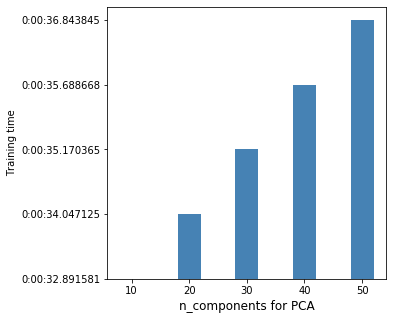

In [85]:
fig,ax = plt.subplots(figsize=(5,5))

# plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 15})
plt.bar(['10', '20', '30', '40', '50'], pca_t.values(), width=0.4, color='steelblue')
plt.xlabel("n_components for PCA", fontsize=12)
plt.ylabel("Training time")
plt.show

plt.savefig('./figs/pca_t.png', bbox_inches='tight')



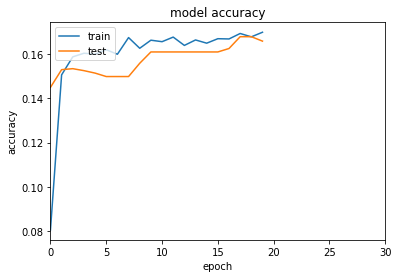

In [112]:
plot(hist_dict[20], 'accuracy', 20)

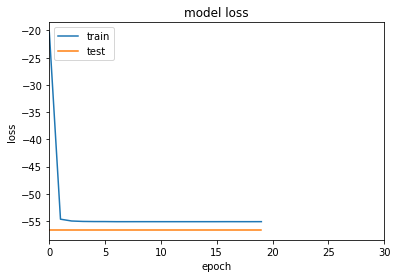

In [111]:
plot(hist_dict[20], 'loss', 20)

In [114]:
mlp.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               30720     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 513       
Total params: 97,281
Trainable params: 97,281
Non-trainable params: 0
_________________________________________________________________


In [123]:
from sklearn import metrics


y_pred = mlp.predict(X_test)
y_pred.astype(float)
# y_test = np
print(metrics.precision_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets